# Scientific Libraries

The core language of Python is rather small. You almost always need to import additional functionality in the form of scientific libraries, i.e. collections of efficient code that implement certain routines. 

In terms of popularity, the big four Python libraries are:

1. **NumPy**: provides basic array data types such as vectors and matrices plus core array operations & basic numerical programming (e.g. random number generator, common mathematical functions)
2. **SciPy**: adds other kinds of numerical methods that are routinely used (e.g. interpolation, optimization)
3. **Matplotlib**: for generating figures, with a focus on plotting data stored in NumPy arrays
4. **Pandas**: provides data types and functions for empirical work (e.g. manipulating data), fast and efficient data analysis tool

Use `import` to load any packages in the first lines of your program and access functionalities afterwards via the syntax `packagename.attribute`. Example:

## Numpy: Math operations, Array and vectorized operations

In [1]:
import numpy as np  # imports package as 'np' (shorter)
np.sqrt(4)

2.0

Another way to access NumPy's square root function directly is

In [2]:
from numpy import sqrt
sqrt(4)

2.0

Numpy is far faster than native Python for operations on arrays. Here, we define a 3000 by 3000 array, and we compute the square of this matrix, element-wise

In [3]:
myarray = np.random.random([3000, 3000])

In [4]:
myarray_sq = np.zeros_like(myarray) #preallocate another array
from tqdm import tqdm
for ij, el in tqdm(np.ndenumerate(myarray), total = myarray.size): #for each element, write element squared (like in a Matlab loop)
    myarray_sq[ij] = el**2

100%|██████████| 9000000/9000000 [00:05<00:00, 1528058.40it/s]


In case such as a simple squaring, Numpy allows broadcasting the function natively, which is orders of magnitude faster:

In [5]:
myarray_sq = myarray**2

This is equivalent to:

In [6]:
myarray_sq = np.square(myarray)

However, this may not be practical for more complicated functions. One way is to use numpy.vectorize, which is faster than a for loop but slower than the native methods

In [7]:
squarer = lambda x: x**2
squarer_vec = np.vectorize(squarer)

In [8]:
myarray_sq = squarer_vec(myarray)

If you want to do more complicated operations, it may be work to pre-allocate some intermediate arrays, and do the operations in vectorized form using Numpy's native functions. 

Another way is to use `numba`, which creates compiled code for simple operations

In [9]:
from numba import jit
@jit(nopython = True) #decorator for numba compiled functions
def square_ndarray(myarray):
    myarray_sq = np.zeros_like(myarray) #preallocate another array
    for ij, el in np.ndenumerate(myarray): #for each element, write element squared (like in a Matlab loop)
        myarray_sq[ij] = el**2

In [10]:
square_ndarray(np.asarray([0, 1])) #pre-compile the function

In [12]:
square_ndarray(myarray) ##As fast as the native numpy operation

## Numpy has fast functions for many statistics (Min, max, mean, quantiles)

In [15]:
arr = np.random.random([3000, 3000]) * 100

In [19]:
arr.max() #maximum value in the whole array
arr.max(axis = 0) #maximum value across rows (Returns vector)
arr.max(axis = 1) #maximum value across columns (returns vector)

array([99.99410099, 99.90007271, 99.94554958, ..., 99.99915776,
       99.96955425, 99.99103661])

In [39]:
np.quantile(arr, 0.5, axis = 0) #median value of each row

array([49.05786659, 48.11386791, 50.31375996, ..., 51.19005172,
       51.03104461, 51.75934372])

Sometimes, can apply Numpy functions to objects which are not numpy arrays. For instance, to a list:

In [31]:
list = arr.tolist() #this creates a list with all of the rows

Lists do not have a "max" method:

```python
list.max()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[33], line 1
----> 1 list.max()

AttributeError: 'list' object has no attribute 'max'
```

But we can use the np.max method and it knows that to do:

In [34]:
np.max(list)
np.max(list, axis = 0)
np.max(list, axis = 1)

array([99.99410099, 99.90007271, 99.94554958, ..., 99.99915776,
       99.96955425, 99.99103661])

## Vectorized operations in Numpy: working with several arrays, logic

In [43]:
arr_a = np.random.random([3000, 3000]) * 100
arr_b = np.random.random([3000, 3000]) * 100
arr_c = np.random.random([3000, 3000]) * 100

In [40]:
np.greater(arr_a, arr_b) #boolean array, true where arr_a > arr_b

array([[ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False,  True],
       [ True,  True, False, ...,  True, False,  True],
       [ True, False, False, ..., False,  True, False]])

In [41]:
arr_a > arr_b #these operations can be broadcasted in the language

array([[ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False,  True],
       [ True,  True, False, ...,  True, False,  True],
       [ True, False, False, ..., False,  True, False]])

#### Logical statements in Python do not work with arrays. We use Numpy for this.

```python

(arr_a > arr_b) or (arr_a > arr_c)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[45], line 1
----> 1 (arr_a > arr_b) or (arr_a > arr_c)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
```

In [53]:
np.any([arr_a > arr_b, arr_a > arr_c], axis = 0) #or statement when adding the argument axis = 0

array([[False, False,  True, ...,  True,  True, False],
       [ True,  True, False, ..., False,  True,  True],
       [ True,  True, False, ..., False, False,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ..., False, False,  True],
       [False,  True,  True, ...,  True,  True, False]])

In [54]:
(arr_a > arr_b) | (arr_a > arr_c) #broadcasted or operation, far more intuitive

array([[False, False,  True, ...,  True,  True, False],
       [ True,  True, False, ..., False,  True,  True],
       [ True,  True, False, ..., False, False,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ..., False, False,  True],
       [False,  True,  True, ...,  True,  True, False]])

In [55]:
(arr_a > arr_b) & (arr_a > arr_c) #broadcasted or operation, far more intuitive

array([[False, False,  True, ...,  True,  True, False],
       [False, False, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       ...,
       [False,  True,  True, ...,  True,  True, False],
       [False, False,  True, ..., False, False,  True],
       [False, False, False, ...,  True, False, False]])

In [57]:
np.mean((arr_a > arr_b) & (arr_a > arr_c)) #In how many cases is arr_a greater than arr_b and arr_c?

0.333384

## Introduction to Data Management with Pandas

This section borrows parts from the corresponding [Chapter](https://python-programming.quantecon.org/pandas.html) of the [QuantEcon Python Programming for Economics and Finance course](https://python-programming.quantecon.org/intro.html) by Thomas J. Sargent and John Stachurski. The [pandas documentation](https://pandas.pydata.org/docs/index.html) is also a great resource for this part.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # importing a sub-routine
plt.rcParams["figure.figsize"]=[10,8] # Set default figure 1e
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams.update({"figure.figsize" : (10, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "white"})

Two important data types defined by pandas are `Series` and `DataFrame`. 

You can think of a Series as a "column" of data, such as a collection of observations for a single variable. A DataFrame is an object for storing multiple *related* columns of data.

Each series and dataframe is, in the background, powered by Numpy arrays, so you can do to them anything you can do with a Numpy array

### Series

Imagine four listed companies with the values being daily returns on their shares:

In [72]:
s = pd.Series(np.random.randn(4), name='daily returns')
y = pd.Series(np.random.randn(4)*10000, name='stock value')
s

0   -1.362597
1   -2.508680
2    0.558422
3   -0.643713
Name: daily returns, dtype: float64

Pandas `Series` are built on top of NumPy arrays and support many similar operations. For example:

In [73]:
s * 100

0   -136.259731
1   -250.868030
2     55.842221
3    -64.371335
Name: daily returns, dtype: float64

In [74]:
s.describe()

count    4.000000
mean    -0.989142
std      1.286175
min     -2.508680
25%     -1.649118
50%     -1.003155
75%     -0.343179
max      0.558422
Name: daily returns, dtype: float64

In [75]:
s.index = ['AMZN','APPL','MSFT','GOOG'] # flexible indices
y.index = s.index
s

AMZN   -1.362597
APPL   -2.508680
MSFT    0.558422
GOOG   -0.643713
Name: daily returns, dtype: float64

In [78]:
s['AMZN'] # show indexed value

-1.3625973141054295

In [79]:
s['AMZN'] = 0 # edit individual values
s

AMZN    0.000000
APPL   -2.508680
MSFT    0.558422
GOOG   -0.643713
Name: daily returns, dtype: float64

In [80]:
'APPL' in s

True

#### DataFrames

A `DataFrame` contains several columns, one for each variable. For example:

In [81]:
df = pd.DataFrame({
    'categorical': pd.Categorical(['d','e','f']), 
    'numeric': [1,2,3],
    'object':['a','b','c']    
    })
df

,categorical,numeric,object
0,d,1,a
1,e,2,b
2,f,3,c


In [82]:
df2 = pd.DataFrame([s, y]).transpose()

In [83]:
df2

,daily returns,stock value
AMZN,0.000000,10944.068351
APPL,-2.508680,7196.416272
MSFT,0.558422,3142.361606
GOOG,-0.643713,13102.665174


In [23]:
df.describe() # by default only numeric fields are returned

,numeric
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [84]:
df2.describe(include='all') 

,daily returns,stock value
count,4.000000,4.000000
mean,-0.648493,8596.377851
std,1.333855,4378.906322
min,-2.508680,3142.361606
25%,-1.109955,6182.902605
50%,-0.321857,9070.242311
75%,0.139606,11483.717557
max,0.558422,13102.665174


Now let's assume we have a CSV file with data stored on our computer that we want to work with. You can read it in using the `pandas` function `read_csv`.

In [85]:
import os

In [90]:
df = pd.read_csv('./data/test_pwt.csv') # File from this directory

If you want to directly access a file from a website you can use the same code with the URL in brackets. If you want to read in data contained in a Stata `.dta` file to dataframes, use pandas' `.read_stata()` routine.

There is also a library called [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest) that gives you access to many data sources (e.g. from the World Bank) straight from the Jupyter notebook.

>Tip: Raw data in CSV format can always be viewed by double-clicking on the file in the browser.

In [89]:
df # display data

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [91]:
type(df) # check type of object at hand

pandas.core.frame.DataFrame

In [93]:
df.head() # Shows first rows of the dataframe

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [94]:
df.head(2)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,295072.21869,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.72483,541804.65210,67.759026,6.720098


In [32]:
len(df) # number of rows/obs

8

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          8 non-null      object 
 1   country isocode  8 non-null      object 
 2   year             8 non-null      int64  
 3   POP              8 non-null      float64
 4   XRAT             8 non-null      float64
 5   tcgdp            8 non-null      float64
 6   cc               8 non-null      float64
 7   cg               8 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 644.0+ bytes


In [97]:
df.columns

Index(['country', 'country isocode', 'year', 'POP', 'XRAT', 'tcgdp', 'cc',
       'cg'],
      dtype='object')

Missing values are usually represented in the form of NaN or null or None in the dataset.

In [34]:
df.isnull()
#dataframe -> dataframe (bool)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False


In [35]:
print(df.isnull().sum()) #check if there are null values across variables (axis = 0 by default)

country            0
country isocode    0
year               0
POP                0
XRAT               0
tcgdp              0
cc                 0
cg                 0
dtype: int64


In [36]:
print(df.isnull().sum(axis = 1)) #check if there are null values across rows 

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [37]:
df.index

RangeIndex(start=0, stop=8, step=1)

Several ways of slicing the dataframe, but be careful, because it can get a bit confusing

In [100]:
df[2:5] # select particular rows or:

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [99]:
df.iloc[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [38]:
df.loc[df.index[2:5], ['year', 'POP']]

,year,POP
2,2000,1006300.297
3,2000,6114.570
4,2000,11801.505


In [39]:
df[['country','tcgdp']] # select particular columns

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


In [40]:
dfrich = df[df.tcgdp > 2.525596e+04]
dfrich

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [41]:
dfrich.index[4]

5

To select both rows and columns using integers, you can use the `iloc` attribute with the syntax `.iloc[rows,columns]`

In [42]:
df.iloc[2:5,0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


To select rows and columns using both integers and labers, use the `loc` attribute

In [43]:
df.loc[df.index[2:5],['country','tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [44]:
df.iloc[3] # use single label returns series

country                  Israel
country isocode             ISR
year                       2000
POP                     6114.57
XRAT                    4.07733
tcgdp              129253.89423
cc                    64.436451
cg                    10.266688
Name: 3, dtype: object

In [45]:
d = {
    'df' : df, 
    'dfrich' : dfrich
}

In [46]:
d['dfrich']

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [47]:
df.loc[[df.index[3]]] ## Give series of one index to get a dataframe of that series

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
3,Israel,ISR,2000,6114.57,4.07733,129253.89423,64.436451,10.266688


In [120]:
pd.DataFrame([df.iloc[3], df.iloc[4]]) ## make a pandas dataframe out of a list of series

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
3,Israel,ISR,2000,6114.570,4.077330,129253.894230,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5026.221784,74.707624,11.658954


In [49]:
df.country == df['country']

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
Name: country, dtype: bool

In [52]:
df.country.str

In [53]:
subset = df.country.str.contains('t') # extract indeces of all countries containing a 't' in their name
subset

0     True
1     True
2    False
3    False
4    False
5     True
6     True
7    False
Name: country, dtype: bool

In [54]:
subset2 = ['t' in name for name in df.country]

In [55]:
subset2

[True, True, False, False, False, True, True, False]

In [56]:
df.loc[subset].head() == df[subset2].head()

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True


In [57]:
print(len(df.country[subset])) # how many are there?

4


#### Merging dataframes

Make anther dataframe where I pretend population, gdp, etc grew randomly up to 2010

In [ ]:
mat = np.random.uniform(0.99, high = 1.06, size = [len(df), 5])
df2 = df.copy()
df2.loc[:, ['POP',	'XRAT',	'tcgdp',	'cc',	'cg',]] = df2.loc[:, ['POP',	'XRAT',	'tcgdp',	'cc',	'cg',]]*mat
df2['year'] = 2010
df2

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2010,3.902081e+04,1.051800,3.083106e+05,78.107021,5.707040
1,Australia,AUS,2010,2.006729e+04,1.824255,5.522302e+05,71.342046,6.926133
2,India,IND,2010,1.008863e+06,45.759192,1.800432e+06,67.561831,14.126648
3,Israel,ISR,2010,6.173315e+03,4.060226,1.323814e+05,64.834937,10.519631
4,Malawi,MWI,2010,1.170916e+04,60.436777,5.042719e+03,78.308783,11.919901
5,South Africa,ZAF,2010,4.496673e+04,7.067479,2.361043e+05,75.589092,6.062664
6,United States,USA,2010,2.958764e+05,1.033767,9.978263e+06,74.614693,6.252353
7,Uruguay,URY,2010,3.359648e+03,12.131364,2.581220e+04,83.175049,5.282139


Then, we can concatenate these two dataframes

In [125]:
df_extended = pd.concat([df, df2]).reset_index().drop(columns = 'index')
df_extended

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,3.733565e+04,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,1.905319e+04,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1.006300e+06,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6.114570e+03,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,1.180150e+04,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,4.506410e+04,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,2.821720e+05,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3.219793e+03,12.099592,2.525596e+04,78.978740,5.108068
8,Argentina,ARG,2010,3.902081e+04,1.051800,3.083106e+05,78.107021,5.707040
9,Australia,AUS,2010,2.006729e+04,1.824255,5.522302e+05,71.342046,6.926133


Imagine we have another dataframe with another variable

In [143]:
df_othervar = df_extended.loc[:,['country', 'country isocode', 'year']].copy()
df_othervar['URBAN_POP'] = df_extended.POP * np.random.uniform(0.5, high = 0.7, size = len(df_extended))
# furthermore, imagine the data is not available for some country-year pairs:
df_othervar = df_othervar.iloc[np.random.random(size = len(df_othervar)) > 0.3]
df_othervar

,country,country isocode,year,URBAN_POP
1,Australia,AUS,2000,10742.403728
2,India,IND,2000,593750.020899
4,Malawi,MWI,2000,7807.971548
5,South Africa,ZAF,2000,24290.873566
8,Argentina,ARG,2010,20514.513505
9,Australia,AUS,2010,11402.637214
10,India,IND,2010,510481.729709
11,Israel,ISR,2010,4108.298409
14,United States,USA,2010,160198.689139
15,Uruguay,URY,2010,2010.959167


We can merge the two dataframes by their common columns:

In [148]:
df_extended.merge(df_othervar, on = ['country', 'country isocode', 'year'], how = 'left') #left join creates missing values in column where no data is present in right dataframe
pd.merge(df_extended, df_othervar,  on = ['country', 'country isocode', 'year'], how = 'left') #same thing

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg,URBAN_POP
0,Argentina,ARG,2000,3.733565e+04,0.999500,2.950722e+05,75.716805,5.578804,NaN
1,Australia,AUS,2000,1.905319e+04,1.724830,5.418047e+05,67.759026,6.720098,10742.403728
2,India,IND,2000,1.006300e+06,44.941600,1.728144e+06,64.575551,14.072206,593750.020899
3,Israel,ISR,2000,6.114570e+03,4.077330,1.292539e+05,64.436451,10.266688,NaN
4,Malawi,MWI,2000,1.180150e+04,59.543808,5.026222e+03,74.707624,11.658954,7807.971548
5,South Africa,ZAF,2000,4.506410e+04,6.939830,2.272424e+05,72.718710,5.726546,24290.873566
6,United States,USA,2000,2.821720e+05,1.000000,9.898700e+06,72.347054,6.032454,NaN
7,Uruguay,URY,2000,3.219793e+03,12.099592,2.525596e+04,78.978740,5.108068,NaN
8,Argentina,ARG,2010,3.902081e+04,1.051800,3.083106e+05,78.107021,5.707040,20514.513505
9,Australia,AUS,2010,2.006729e+04,1.824255,5.522302e+05,71.342046,6.926133,11402.637214


#### Subsetting dataframes

If you are only interested in a sub-set of variables, you can strip the data frame down to only those variables by overwriting it using the selection methods described above:

In [149]:
df = df[['country','POP','tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [151]:
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


#### Modifying the dataframe index

In [153]:
df = df.set_index('country') # set index to be country because it is redundant
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [154]:
df.columns = 'population', 'total GDP' # rename columns
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [155]:
df['population'] * 1e3

country
Argentina        3.733565e+07
Australia        1.905319e+07
India            1.006300e+09
Israel           6.114570e+06
Malawi           1.180150e+07
South Africa     4.506410e+07
United States    2.821720e+08
Uruguay          3.219793e+06
Name: population, dtype: float64

In [156]:
import math

In [158]:
df['population'].map(lambda x: math.log(x) > 5)

country
Argentina        True
Australia        True
India            True
Israel           True
Malawi           True
South Africa     True
United States    True
Uruguay          True
Name: population, dtype: bool

In [159]:
df['population'] = df['population'] * 1e3 # convert population from thousands to single units
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [160]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population'] # adding a column showing real GDP per capita, obtained by the other two columns
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


In [161]:
df.describe()

,population,total GDP,GDP percap
count,8.000000e+00,8.000000e+00,8.000000
mean,1.763826e+08,1.606312e+06,13448.569581
std,3.479223e+08,3.397025e+06,13047.950117
min,3.219793e+06,5.026222e+03,425.896679
25%,1.037977e+07,1.032544e+05,4211.316944
50%,2.819442e+07,2.611573e+05,7873.599852
75%,1.043411e+08,8.383896e+05,22963.112877
max,1.006300e+09,9.898700e+06,35080.381854


#### Careful with the index! Now, the loc function can give us trouble!

```python

df[3]

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File c:\Users\asanc\anaconda3\envs\gds4ae\Lib\site-packages\pandas\core\indexes\base.py:3805, in Index.get_loc(self, key)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
   3806 except KeyError as err:

(BLA BLA BLA, VERY LONG ERROR MESSAGE)

KeyError: 3
```
This is because the 3 index no longer exists! We need to either obtain the nth element of the index, or use iloc

In [166]:
df.loc[[df.index[2]]]

,population,total GDP,GDP percap
country,,,
India,1.006300e+09,1.728144e+06,1717.324719


In [168]:
df.iloc[[2]]

,population,total GDP,GDP percap
country,,,
India,1.006300e+09,1.728144e+06,1717.324719


# Plotting

Data objects in `pandas` have methods for plotting and visualization that work through `matplotlib`. For example:

<Axes: xlabel='country'>

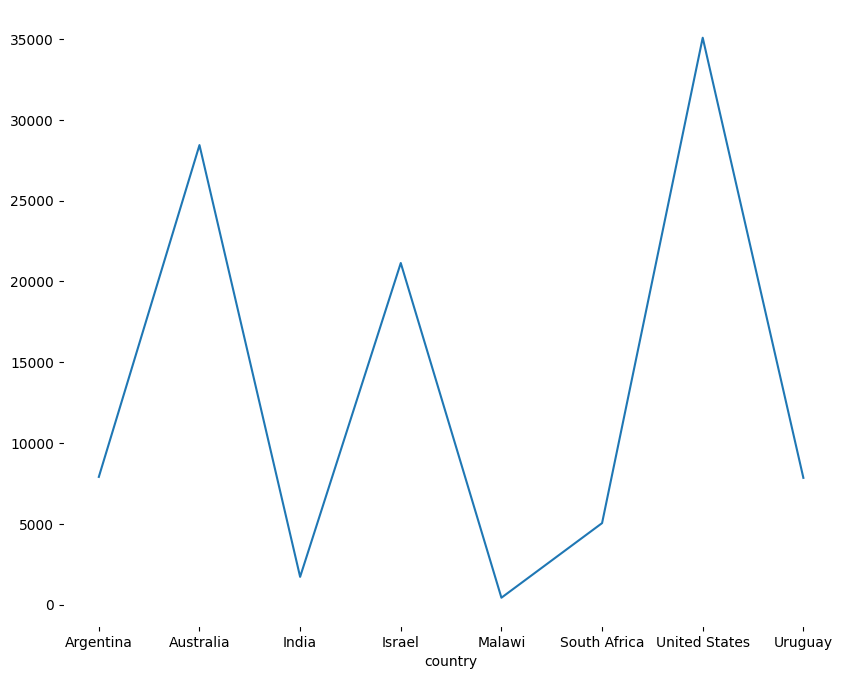

In [169]:
df['GDP percap'].plot()

Here it doesn't make a lot of sense to do a line plot, we do a bar plot:

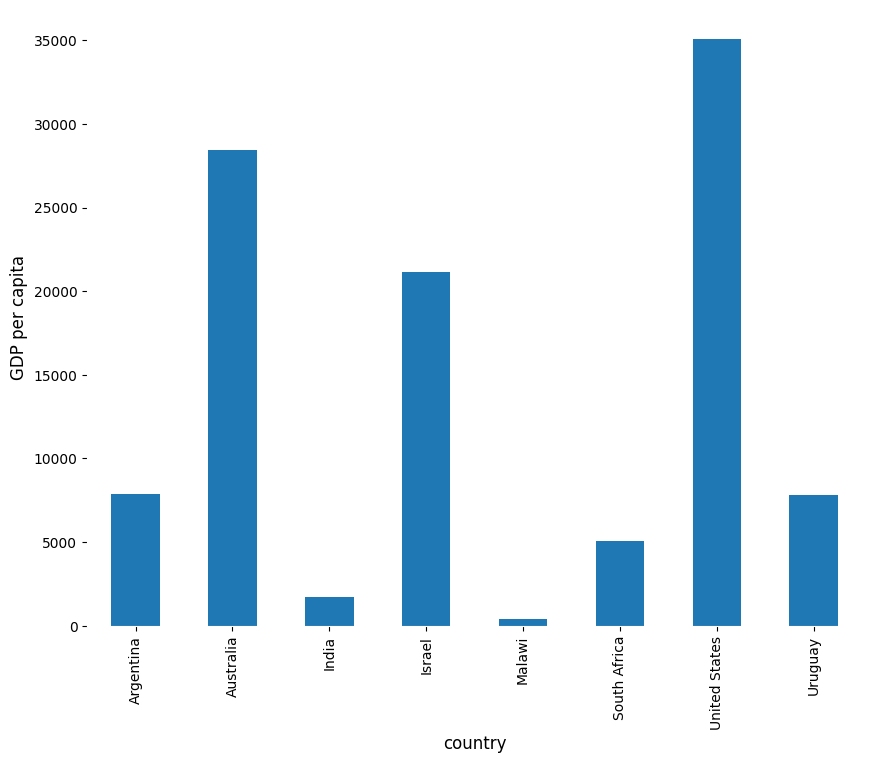

In [70]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show() # remember we called the `pyplot` routine of matplotlib "plt"

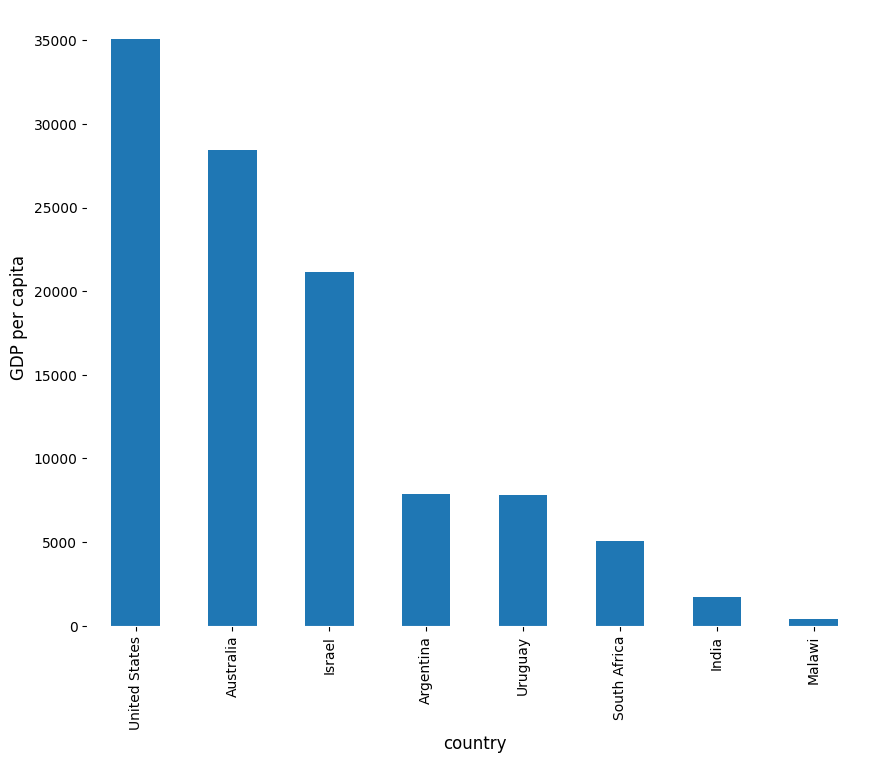

In [170]:
df = df.sort_values(by='GDP percap', ascending=False) # change order of data frame from alphabetically to GDP per capita

ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)

plt.show()